aerialpompeiiperiodic.jpg

i7w0S.png

MHcHVmX.png

oIumJ.png

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
# API
def printImg(a, b):
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1), plt.imshow(a, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.subplot(1, 2, 2), plt.imshow(b, cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def inverseFourier(spectrum):
    img_back = np.fft.ifftshift(spectrum)
    img_back = np.fft.ifft2(img_back)
    img_back = np.abs(img_back)
    return img_back

def fourier(img):
    f = np.fft.fft2(img)
    f = np.fft.fftshift(f)
    return f

def gaussianOne(size, intensity, img):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    x = cv2.getGaussianKernel(size * 2, intensity)
    gaussian = x * x.T
    mask2 = np.ones((rows, cols))
    mask2[crow - size:crow + size, ccol-size:ccol+size] = gaussian
    return mask2

def gaussianZero(size, intensity, img):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2
    x = cv2.getGaussianKernel(size * 2, intensity)
    gaussian = x * x.T
    mask2 = np.zeros((rows, cols))
    mask2[crow - size:crow + size, ccol-size:ccol+size] = gaussian
    return mask2

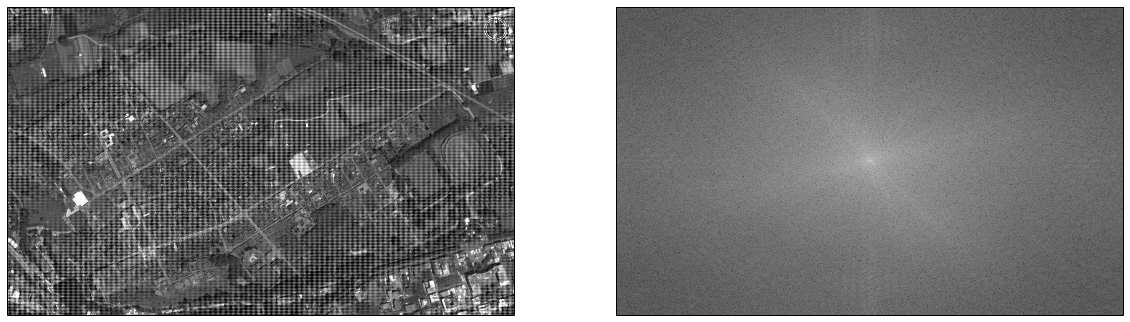

(808, 1332)


In [3]:
# Load image
img = cv2.imread('aerialpompeiiperiodic.jpg', 0)
# Fourier transformation
f = fourier(img)
# Normalization
magnitud = np.log(1 + np.abs(f))
# Printing
printImg(img, magnitud)
print(img.shape)

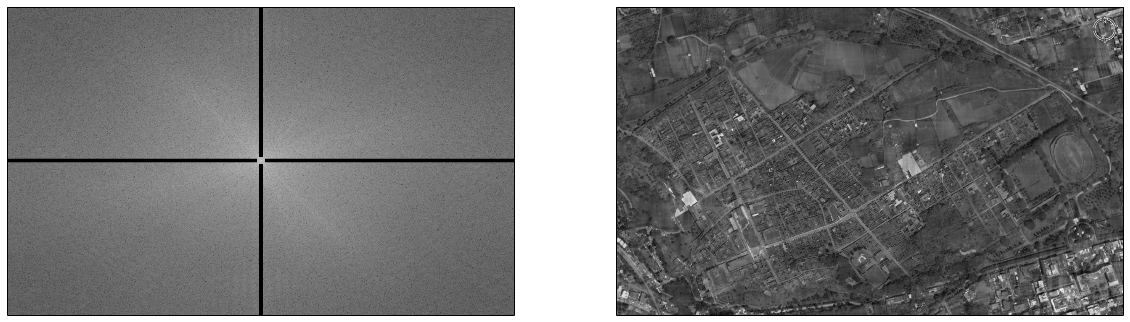

In [4]:
def customMask(img):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2 # center row, center column
    # Modifying spectrum
    mask = np.ones((rows, cols), np.uint8)
    ## Removing vertical and horizontal high frequencies
    n = 5
    mask[0 : rows, ccol - n : ccol + n] = 0
    mask[crow - n : crow + n, 0 : cols] = 0
    ## Center correction
    n2 = 10
    mask[crow - n2 : crow + n2, ccol-n2 : ccol + n2] = 1
    return mask
    
mask = customMask(img)
## Gaussian mask
gaussian = gaussianZero(120, 300, img)

# Applying filters
f_filter = f * mask #* gaussian 
# Normalization
magnitude = np.log(1 + np.abs(f_filter))
# Anti-Fourier Transformation
img_back = inverseFourier(f_filter)
# Printing
printImg(magnitude, img_back)

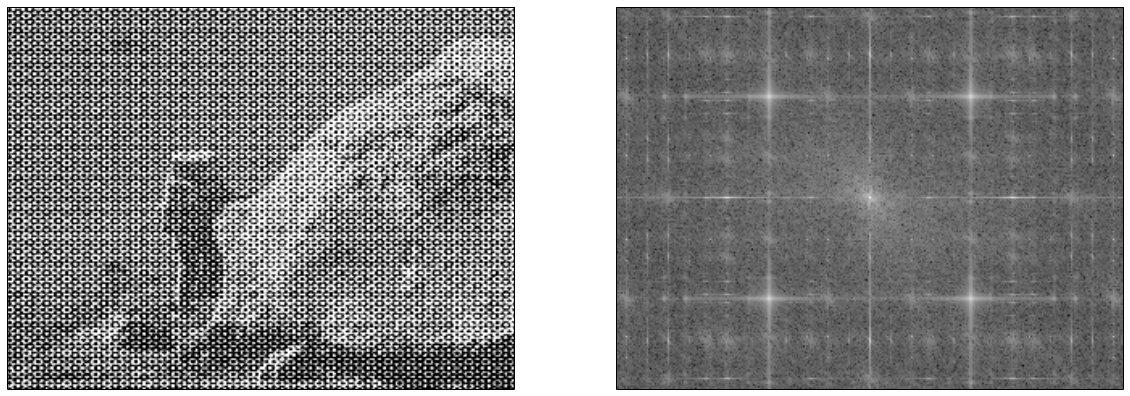

(237, 315)


In [5]:
# Load image
img = cv2.imread('i7w0S.png', 0)
# Fourier transformation
f = fourier(img)
# Normalization
magnitud = np.log(1 + np.abs(f))
# Printing
printImg(img, magnitud)
print(img.shape)

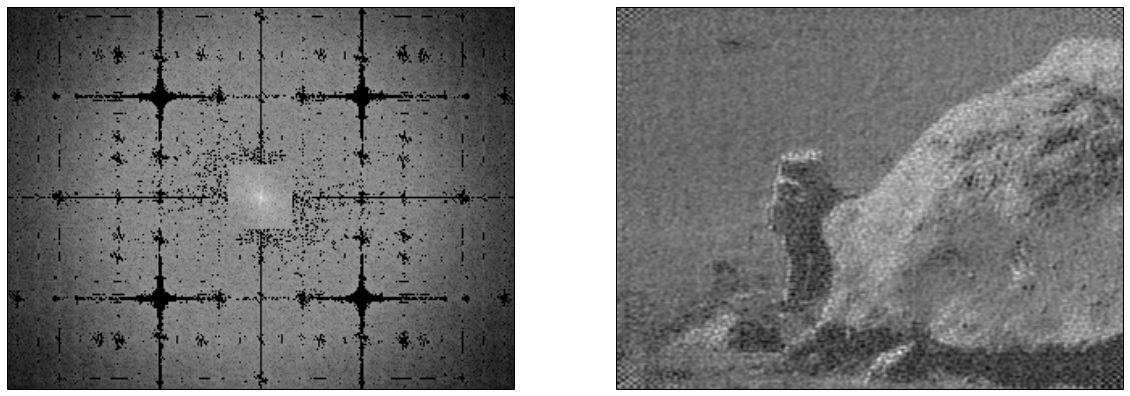

In [8]:
def distance(u, v, img):
    M, N = img.shape
    d = np.sqrt(np.power(u - M / 2, 2) + np.power(v - N / 2, 2))
    return d

def butter(u, v, d0, n, img):
    dummy = 1 / (1 + np.power(distance(u, v, img)/d0, 2*n))
    return dummy

def customMask(dist, width, img):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2 # center row, center column
    mask = np.ones((rows, cols))    
    for x in range(0,rows):
        for y in range(0,cols):
            mask[x][y] = butter(x, y, 100, 5, img)
    mask[magnitud>0.60 * magnitud.max()]=0
    n = 20
    mask[(rows // 2) - n: (rows // 2) + n, (cols // 2) - n: (cols // 2) + n] = 1
    return mask
    
mask = customMask(70, 3,img)
# Applying filters
f_filter = f * mask #* mask 
# Normalization
magnitude = np.log(1 + np.abs(f_filter))
# Anti-Fourier Transformation
img_back = inverseFourier(f_filter)
# Printing
printImg(magnitude, img_back)

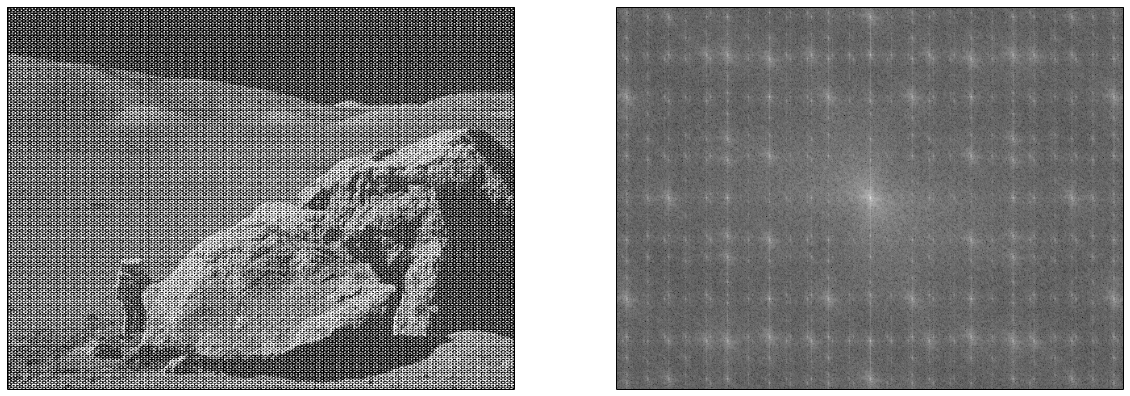

(474, 630)


In [9]:
# Load image
img = cv2.imread('MHcHVmX.png', 0)
# Fourier transformation
f = fourier(img)
# Normalization
magnitud = np.log(1 + np.abs(f))
# Printing
printImg(img, magnitud)
print(img.shape)

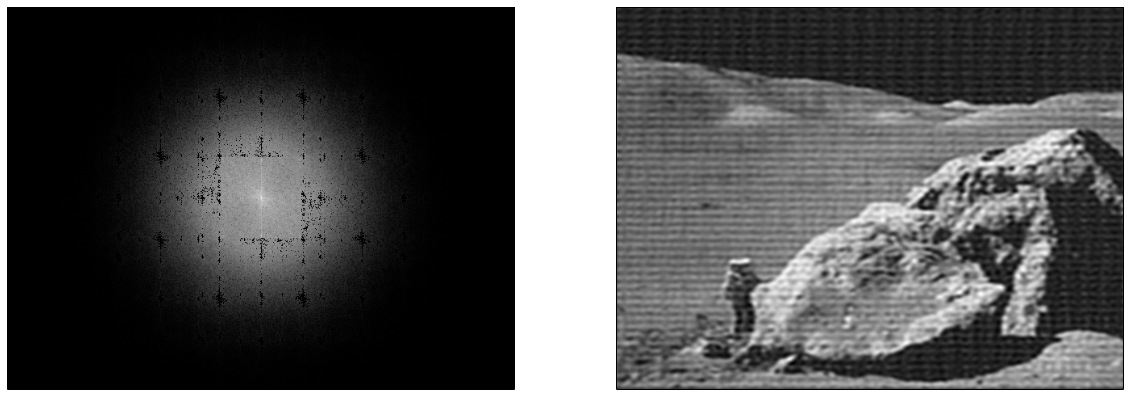

In [10]:
def distance(u, v, img):
    M, N = img.shape
    d = np.sqrt(np.power(u - M / 2, 2) + np.power(v - N / 2, 2))
    return d

def butter(u, v, d0, n, img):
    dummy = 1 / (1 + np.power(distance(u, v, img)/d0, 2*n))
    return dummy

def customMask(img):
    rows, cols = img.shape
    mask = np.ones((rows, cols))
    for x in range(0,rows):
        for y in range(0,cols):
            mask[x][y] = butter(x, y, 70, 5, img)
    mask[magnitud>0.60 * magnitud.max()]=0
    n = 50
    mask[(rows // 2) - n: (rows // 2) + n, (cols // 2) - n: (cols // 2) + n] = 1
    return mask
    
mask = customMask(img)
# Applying filters
f_filter = f * mask #* gaussian 
# Normalization
magnitude = np.log(1 + np.abs(f_filter))
# Anti-Fourier Transformation
img_back = inverseFourier(f_filter)
# Printing
printImg(magnitude, img_back)

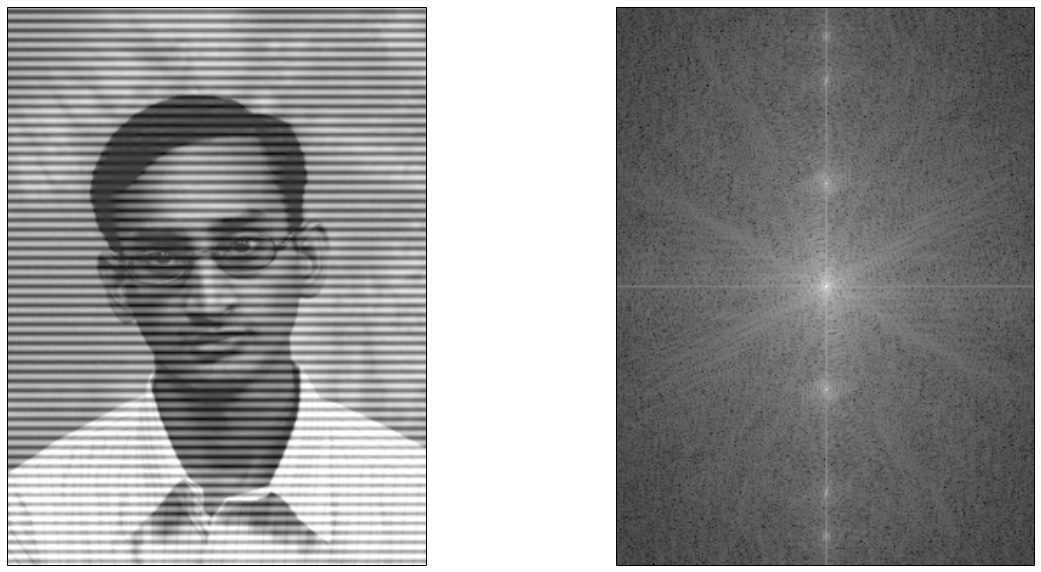

(320, 240)


In [11]:
# Load image
img = cv2.imread('oIumJ.png', 0)
# Fourier transformation
f = fourier(img)
# Normalization
magnitud = np.log(1 + np.abs(f))
# Printing
printImg(img, magnitud)
print(img.shape)

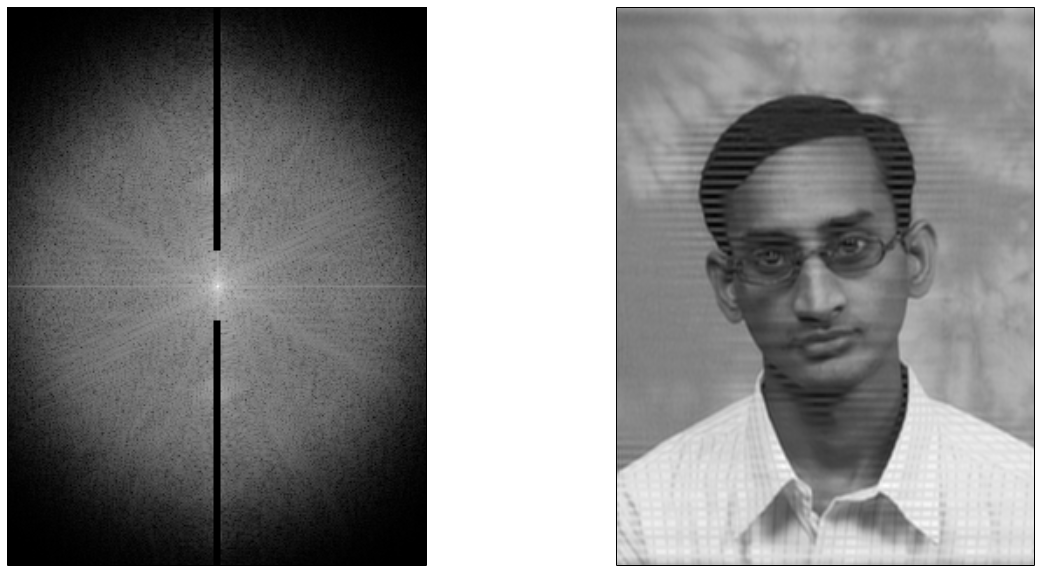

In [12]:
def distance(u, v, img):
    M, N = img.shape
    d = np.sqrt(np.power(u - M / 2, 2) + np.power(v - N / 2, 2))
    return d

def butter(u, v, d0, n, img):
    return 1 / (1 + np.power(distance(u, v, img)/d0, 2*n))

def customMask(img):
    rows, cols = img.shape
    crow, ccol = rows // 2, cols // 2 # center row, center column
    mask = np.ones((rows, cols))
    for x in range(0,rows):
        for y in range(0,cols):
            mask[x][y] = butter(x, y, 100, 7, img)
    n = 2
    mask[0 : rows, ccol - n : ccol + n] = 0
    # Center correction
    n2 = 20
    mask[crow - n2 : crow + n2, ccol-n2 : ccol + n2] = 1
    return mask

mask = customMask(img)
# Applying filters
f_filter = f * mask
# Normalization
magnitude = np.log(1 + np.abs(f_filter))
# Anti-Fourier Transformation
img_back = inverseFourier(f_filter)
# Printing
printImg(magnitude, img_back)